In [66]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
print( "imorted successfully")

imorted successfully


In [68]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
print ("connection successfull")


connection successfull


In [70]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    sale_id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
);
""")
conn.commit() 
print("database, table created") 

database, table created


In [72]:
sample_data = [
    ("Product A", 10, 50),
    ("Product B", 15, 40),
    ("Product C", 20, 30),
    ("Product A", 5, 50),
    ("Product B", 7, 40)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
print("data inserted successfully, commit")

data inserted successfully, commit


In [73]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""


In [74]:
df = pd.read_sql_query(query, conn)

In [76]:
print("Sales Summary:")
print(df)

Sales Summary:
     product  total_qty  revenue
0  Product A         15    750.0
1  Product B         22    880.0
2  Product C         20    600.0


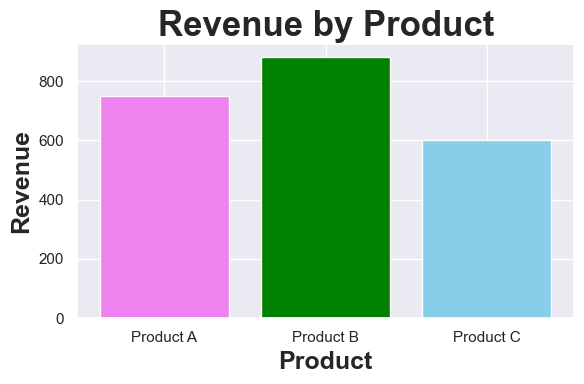

In [94]:
plt.figure(figsize=(6,4))
colors = ['violet', 'Green', 'skyblue']
plt.bar(df['product'], df['revenue'], color=colors)
plt.xlabel("Product", fontsize=18, fontfamily="Arial", weight="bold")
plt.ylabel("Revenue", fontsize=18, fontfamily="Arial", weight="bold")
plt.title("Revenue by Product", fontsize=25, fontfamily="Arial", weight="bold")
plt.tight_layout()
plt.show()
